# Principal Component Analysis

## Table of Contents

1. Data reduced to 3 principal components
3. Now, let's do PCA on just Box1
3. PCA 3D


In [17]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

print('libraries imported.')

libraries imported.


In [18]:
SpectraMatrix = pd.read_csv("data files/SpectraMatrix.csv", header=None, index_col=None)
SpectraMatrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 1764 entries, 0 to 1763
dtypes: float64(1764)
memory usage: 2.7 MB


## Data reduced to 3 principal components)

The first two principal components explain 99.4% of the variance in SpectraMatrix.csv, and by PC4 we have 99.9%.

Below are the first 5 rows of the post-PCA data, then graphs of each principal component.

In [119]:
# transposedSpectraMatrix = SpectraMatrix.transpose()

x = StandardScaler().fit_transform(SpectraMatrix.loc[:, :].values)

pca = PCA(n_components=3).fit(x)
principalComponents = pca.fit_transform(x)
pComponents = pd.DataFrame(data=principalComponents) 

# pc1 = pd.DataFrame(data=principalComponents[0])
# pc2 = pd.DataFrame(data=principalComponents[1])
# pc3 = pd.DataFrame(data=principalComponents[2])

print("pComp:\n" + str(pComponents))
print("pComp[0][0]\n" + str(pComponents[0][0]))
print("pComp[1][0]\n" + str(pComponents[1][0]))
print("pComp[2][0]\n" + str(pComponents[2][0]))

print( "len:" + str(len(pComponents[0])) )




pComp:
              0          1         2
0     40.244181  -2.635071  0.563362
1     67.157649   0.123512  0.713370
2    329.324655  34.213086  5.162386
3    124.794950   5.892644  1.602274
4    134.848243   5.060522  1.615122
..          ...        ...       ...
195  -15.399064   3.782762 -0.833087
196  -15.398529   3.781706 -0.833507
197  -15.483097   3.791678 -0.826471
198  -15.486897   3.790787 -0.824118
199  -15.495400   3.795266 -0.822469

[200 rows x 3 columns]
pComp[0][0]
40.24418059774741
pComp[1][0]
-2.6350713325535966
pComp[2][0]
0.5633621785475093
len:200


In [24]:
j = 0
for i in pca.explained_variance_ratio_.cumsum():
    j += 1
    print(f"PC{j} explained variance: {i*100}")

PC1 explained variance: 96.81477484278285
PC2 explained variance: 99.49958976661648
PC3 explained variance: 99.70887733780735


### PCA 3D

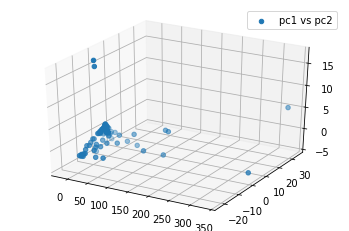

In [120]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

z = pComponents[2]
x = pComponents[0]
y = pComponents[1]
ax.scatter(x, y, z, label='pc1 vs pc2')
ax.legend()

plt.show()


Automatically created module for IPython interactive environment


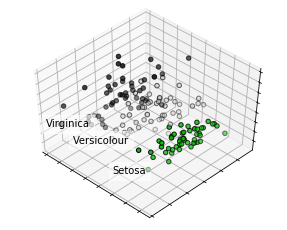

In [121]:
print(__doc__)


# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

# np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
# iris = datasets.load_iris()
# X = iris.data
X = pComponents[0]
# y = iris.target
y = pComponents[1]

fig = plt.figure(1, figsize=(6,5))
plt.clf()

ax = Axes3D(fig, rect=[0,0,.99,1], elev=50,azim=130)

# plt.cla()
# pca = decomposition.PCA(n_components=3)
# pca.fit(X)
# X = pca.transform(X)

for x in range(len(pComponents[0])):
    ax.text3D(x, 
              pComponents[0][x],
              pComponents[1][x],
              "test",
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w') )

# Reorder the labels to have colors matching the cluster results
# y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

ValueError: Can only tuple-index with a MultiIndex